In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [86]:
df = pd.read_csv('Datos para entrenamiento_pandas.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.612245,0,2,0.640,0.358209,0,2,0.500000,1,0.545455,1,1
1,0.265306,0,2,0.650,0.285240,0,1,0.492958,0,0.522727,1,1
2,0.632653,0,1,0.650,0.527363,0,0,0.422535,1,0.409091,1,0
3,0.326531,0,2,0.675,0.814262,0,0,0.528169,0,0.295455,1,1
4,0.469388,1,1,0.750,0.331675,0,0,0.422535,0,0.352273,0,0


# Entrenamiento de los Modelos

In [87]:
X = pd.DataFrame(df.drop(columns = ['HeartDisease']))
y = pd.DataFrame(df['HeartDisease'])

Separacion de los datos en datos de entrenamiento y datos de test

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier()

model_1.fit(X_train, y_train.iloc[:,0])

y_pred1 = model_1.predict(X_test)

Evaluación del modelo

In [90]:
from sklearn.metrics import accuracy_score

accuracy_1 = accuracy_score(y_test, y_pred1)

print("El accurazy del modelo KNN es:",accuracy_1)

El accurazy del modelo KNN es: 0.8623188405797102


## KNN CON GRIDSEARCHCV

In [95]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(1,20)}
model_2 = KNeighborsClassifier()
clf = GridSearchCV(model_2, parameters)
clf.fit(X_train, y_train.iloc[:,0])

y_pred2 = clf.predict(X_test)

In [96]:
clf.best_params_

{'n_neighbors': 5}

Evaluación del modelo

In [97]:
accuracy_2 = accuracy_score(y_test, y_pred2)

print("El accurazy del modelo KNN con GridSearchCV es:",accuracy_2)

El accurazy del modelo KNN con GridSearchCV es: 0.8623188405797102


## Árbol de decision

In [112]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)

y_pred3 = model_3.predict(X_test)

Evaluación del modelo

In [113]:

accuracy_3 = accuracy_score(y_test, y_pred3)

print("El accurazy del modelo árbol de decisión es:",accuracy_3)

El accurazy del modelo árbol de decisión es: 0.782608695652174


## Árbol de decisión con GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV
parameters =  {'max_depth':range(1,50)}
model_4 = DecisionTreeClassifier()
clf = GridSearchCV(model_4, parameters)
clf.fit(X_train, y_train.iloc[:,0])

y_pred4 = clf.predict(X_test)

In [115]:
clf.best_params_

{'max_depth': 1}

Evaluación del modelo

In [116]:
accuracy_4 = accuracy_score(y_test, y_pred4)

print("El accurazy del modelo árbol de decisión con GridSearchCV es:",accuracy_4)

El accurazy del modelo árbol de decisión con GridSearchCV es: 0.7753623188405797


# Análisis de los resultados

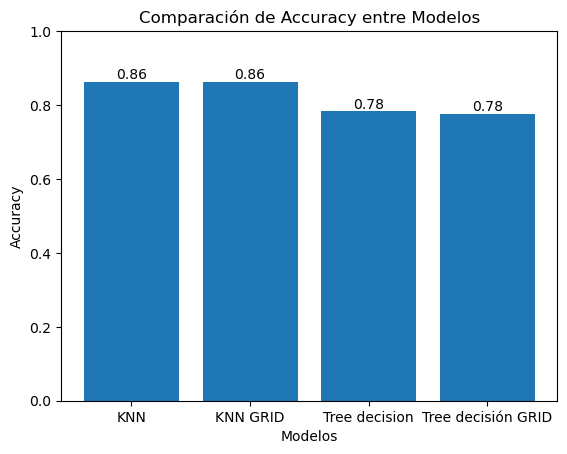

In [117]:

# Datos de ejemplo
models = ["KNN", "KNN GRID", "Tree decision", "Tree decisión GRID"]
accuracies = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]

# Crear figura
plt.figure()

# Crear barras con colores distintos
bars = plt.bar(models, accuracies)

# Añadir etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

# Etiquetas y título
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy entre Modelos")
plt.ylim(0, 1)

# Mostrar gráfico
plt.show()

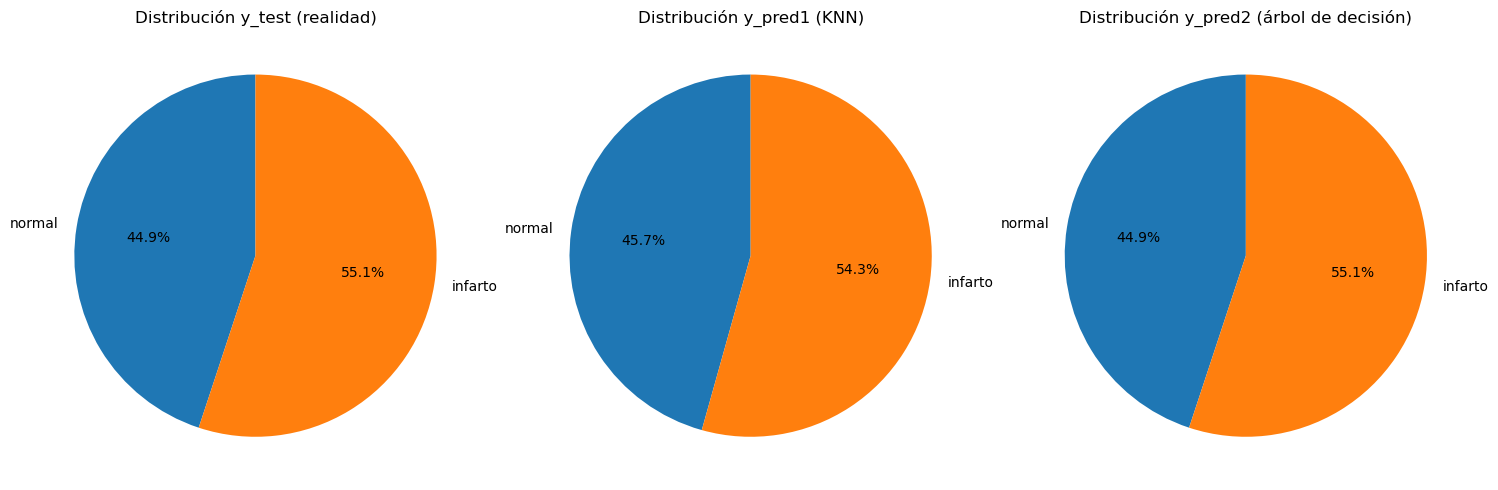

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar clases
KNN_counts = pd.Series(y_pred1).value_counts().sort_index()
test_counts = y_test.iloc[:, 0].value_counts().sort_index()
tree_counts = pd.Series(y_pred3).value_counts().sort_index()

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart 1: y_test
axes[0].pie(
    test_counts.values,
    labels=["normal", "infarto"],
    autopct="%1.1f%%",
    startangle=90
)
axes[0].set_title("Distribución y_test (realidad)")
axes[0].axis("equal")

# Pie chart 2: y_pred1 KNN
axes[1].pie(
    KNN_counts.values,
    labels=["normal", "infarto"],
    autopct="%1.1f%%",
    startangle=90
)
axes[1].set_title("Distribución y_pred1 (KNN)")
axes[1].axis("equal")

# Pie chart 3: y_pred3 tree decision
axes[2].pie(
    tree_counts.values,
    labels=["normal", "infarto"],
    autopct="%1.1f%%",
    startangle=90
)
axes[2].set_title("Distribución y_pred2 (árbol de decisión)")
axes[2].axis("equal")

plt.tight_layout()
plt.show()


In [119]:
joblib.dump(model_1, "modelo_infarto.pkl")

print("✅ Modelo entrenado y guardado como 'modelo_infarto.pkl'")

✅ Modelo entrenado y guardado como 'modelo_infarto.pkl'
